# Wind - Nutirents - CHL : Upwelling

The Caribbean is not well know for being an upwelling zone, but there are some parts where this 'phenomena' happens. The Guajira Peninsula or by the state of Atlantico in Colombia are examples of these specific zones.

North-West of Africa, the west coast of USA or the peruvian Pacific are a couple of the main upwelling areas.

The first months of the year in the colombian Caribbean are windy, and is interesting to see the correlation of this variable with other such as nutrients and chlorophyll.

From the Copernicus Marine Service 3 dataset are download to work with wind, physical and biogeochemical data.
 - Wind observations dataset from [Global Ocean Wind L4 Reprocessed 6 hourly Observations](https://resources.marine.copernicus.eu/product-detail/WIND_GLO_WIND_L4_REP_OBSERVATIONS_012_006/INFORMATION)
 
 - Physical model dataset from [Global Ocean Physics Reanalysis](https://resources.marine.copernicus.eu/product-detail/GLOBAL_MULTIYEAR_PHY_001_030/INFORMATION)
 
 - Biogeochemical model dataset from [Global ocean biogeochemistry hindcast](https://resources.marine.copernicus.eu/product-detail/GLOBAL_MULTIYEAR_BGC_001_029/INFORMATION)


In [1]:
# Dependencies
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import warnings
warnings.filterwarnings('ignore')

# Caribbean Wind feb 2018

In [2]:
# Path to load the wind file
path_wind = 'data/2018/CERSAT-GLO-BLENDED_WIND_L4_REP-V6-OBS_FULL_TIME_SERIE_1661444756237.nc'

# Product Variable
wind = xr.open_dataset(path_wind)

In [3]:
#Display the wind Variable
wind

<xarray.Dataset>
Dimensions:         (time: 61, lat: 41, lon: 61)
Coordinates:
  * lon             (lon) float32 -80.0 -79.75 -79.5 ... -65.5 -65.25 -65.0
  * time            (time) datetime64[ns] 2018-01-26 ... 2018-02-10
  * lat             (lat) float32 8.0 8.25 8.5 8.75 ... 17.25 17.5 17.75 18.0
Data variables:
    northward_wind  (time, lat, lon) float64 ...
    wind_speed      (time, lat, lon) float64 ...
    eastward_wind   (time, lat, lon) float64 ...
Attributes: (12/72)
    Conventions:                                    CF-1.7, ACDD-1.3, ISO 8601
    FROM_ORIGINAL_FILE__netcdf_version_id:          4.6.1 of Sep  8 2018 17:2...
    date_created:                                   2020-12-03T15:00:13
    date_modified:                                  2020-12-03T15:00:13
    id:                                             WIND_GLO_WIND_L4_REP_OBSE...
    naming_authority:                               fr.ifremer.cersat
    ...                                             ...
    publisher_institution:                          CMEMS
    scientific_support_contact:                     Abderrahim.Bentamy@ifreme...
    source_data:                                     
    technical_support_contact:                      cersat@ifremer.fr
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...
    comment:

### Wind Map of the Caribbean region

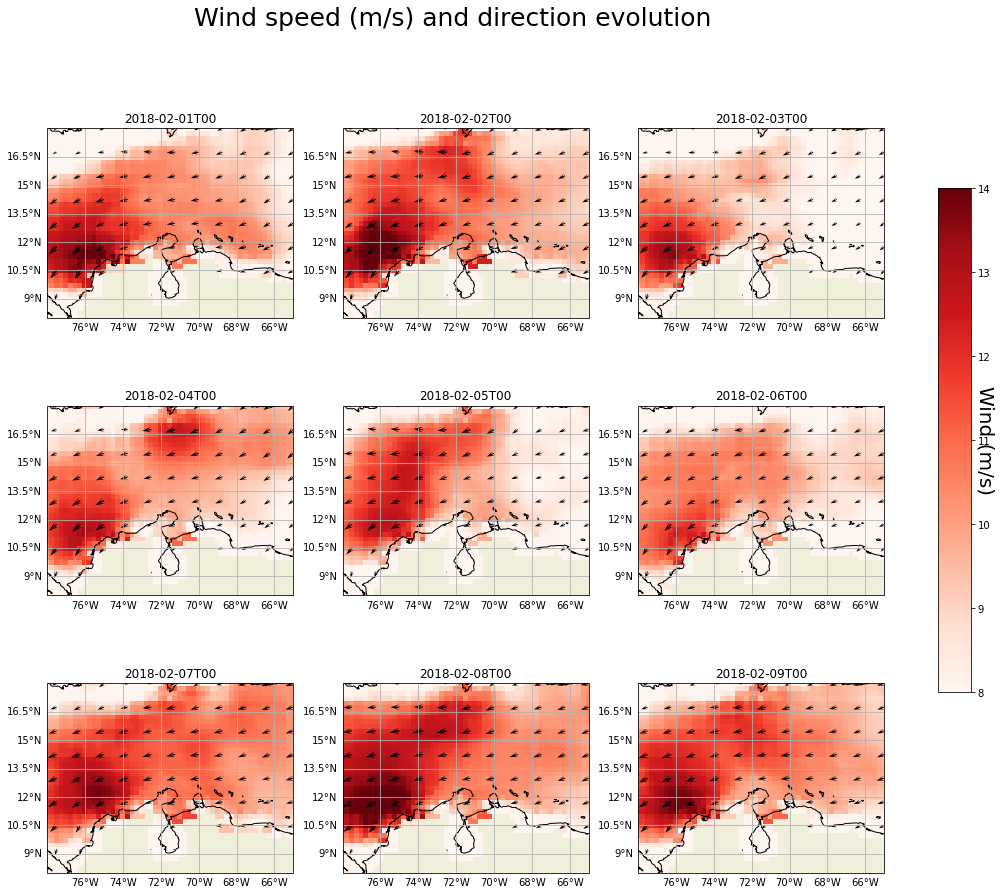

In [4]:
# Define the caracteristics of the plot
f = plt.figure(figsize=(15, 14))                                                   # create a figure and define its size
f.subplots_adjust(right = 0.9, bottom = 0.1, hspace= 0.2,wspace=0.2)               # adjust the space between subplots
axs = []
for i in range(9) :
    ax = f.add_subplot(3,3,i+1,projection=ccrs.PlateCarree())                      # the figure will be composed of 3x3 maps
    ax.coastlines()                                                                # add the coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                    # add the longitude / latitude lines
    gl.right_labels = False                                                        # remove latitude labels on the right
    gl.top_labels = False                                                          # remove longitude labels on the top
    ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                         # add land mask
    ax.set_extent([-78, -65, 8, 18],crs=ccrs.PlateCarree())                          # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
    axs.append(ax)

# Define the dates and plot the wind maps
start_date = np.datetime64('2018-02-01')
step_arrows = 5
for i in range(9):
    date = start_date + i
    # add the wind speed in the background : change vmin / vmax to set the colorbar values and cmap to change the color palette
    im = axs[i].pcolor(wind['lon'].data, wind['lat'].data,wind['wind_speed'].sel(time=date).squeeze(),vmin=8,vmax=14,cmap='Reds')
    # add the wind direction arrows : step_arrows reduces the number of vectors plotted
    vect = axs[i].quiver(wind['lon'].data[::step_arrows],wind['lat'].data[::step_arrows],
                         wind['eastward_wind'].sel(time=date).squeeze().data[::step_arrows,::step_arrows],
                         wind['northward_wind'].sel(time=date).squeeze().data[::step_arrows,::step_arrows],
                         headlength=8,headwidth=5,scale=300)
    # add the date in the map titles 
    axs[i].set_title(np.datetime_as_string(date,unit='h'))
    

# Add the titles and legend
f.suptitle('Wind speed (m/s) and direction evolution',fontsize=25)                 # add a title to the figure
cbar_ax = f.add_axes([0.95, 0.3, 0.03, 0.5])                                       # define the colorbar location
cbar =f.colorbar(im,cax=cbar_ax)                                                   # display the colorbar
cbar.set_label('Wind (m/s)', rotation=270,fontsize=20)                             # add the title of the colorbar

# Save figure
plt.savefig('images/wind_evolution_feb_caribe_2018.png')

# Time Series Correlation: wind-nutrients(no3)-sst-chl

In [5]:
# Path to load the physical file
path_mod_phy = 'data/2018/cmems_mod_glo_phy_my_0.083_P1D-m_1661549117426.nc'

# Physical model Variable
mod_phy = xr.open_dataset(path_mod_phy)

In [6]:
# Display the physical model variable
mod_phy

<xarray.Dataset>
Dimensions:    (time: 16, latitude: 121, longitude: 181, depth: 36)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 763.3 902.3 1.062e+03
  * latitude   (latitude) float32 8.0 8.083 8.167 8.25 ... 17.83 17.92 18.0
  * time       (time) datetime64[ns] 2018-01-26T12:00:00 ... 2018-02-10T12:00:00
  * longitude  (longitude) float32 -80.0 -79.92 -79.83 ... -65.17 -65.08 -65.0
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
Attributes: (12/25)
    title:                              daily mean fields from Global Ocean P...
    easting:                            longitude
    northing:                           latitude
    history:                            2021/09/02 23:29:48 MERCATOR OCEAN Ne...
    source:                             MERCATOR GLORYS12V1
    institution:                        MERCATOR OCEAN
    ...                                 ...
    FROM_ORIGINAL_FILE__longitude_max:  179.91667
    FROM_ORIGINAL_FILE__latitude_min:   -80.0
    FROM_ORIGINAL_FILE__latitude_max:   90.0
    z_min:                              0.494025
    z_max:                              5727.917
    _CoordSysBuilder:                   ucar.nc2.dataset.conv.CF1Convention

In [7]:
# Path to load the biogeochemical file
path_mod_bio = 'data/2018/cmems_mod_glo_bgc_my_0.25_P1D-m_1661550129028.nc'

# Biogeochemical model Variable
mod_bio = xr.open_dataset(path_mod_bio)

In [8]:
# Display the biogeochemical model variable
mod_bio

<xarray.Dataset>
Dimensions:    (time: 16, depth: 48, latitude: 41, longitude: 61)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 ... 947.4 1.046e+03 1.152e+03
  * latitude   (latitude) float32 8.0 8.25 8.5 8.75 ... 17.25 17.5 17.75 18.0
  * time       (time) datetime64[ns] 2018-01-26T12:00:00 ... 2018-02-10T12:00:00
  * longitude  (longitude) float32 -80.0 -79.75 -79.5 ... -65.5 -65.25 -65.0
Data variables:
    no3        (time, depth, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Daily mean fields for product GLOBAL_REANA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-daily
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

### Time Series plot corr

In [9]:
# Define the coordinates of the point on which to plot the time series
lon = -74.9
lat = 12.25
depth = 0

# Select the closest data from the products to this point
sst_point = mod_phy.sel(longitude=lon,latitude=lat,depth=depth,method='nearest')
bio_point = mod_bio.sel(longitude=lon,latitude=lat,depth=depth,method='nearest')
wind_point = wind.sel(lon=lon,lat=lat,method='nearest')

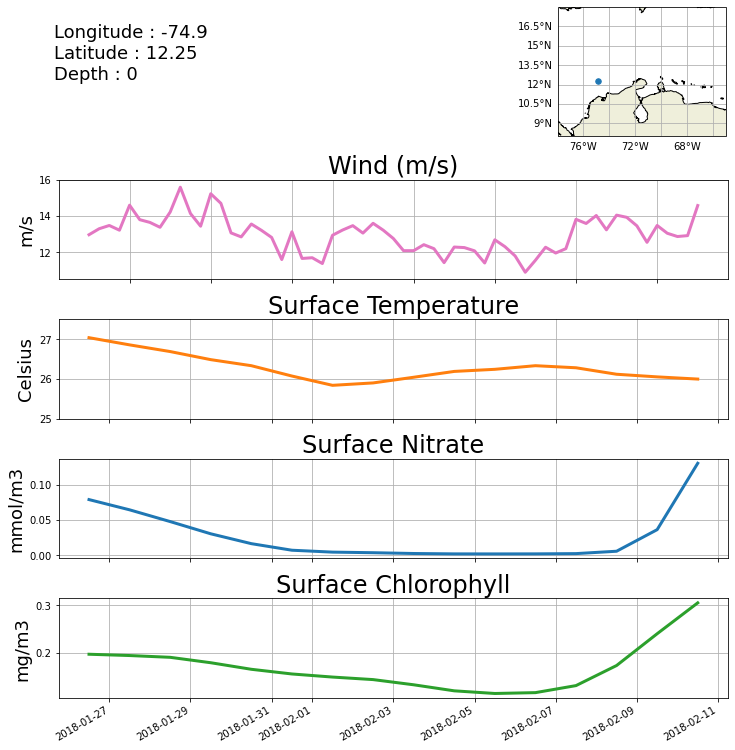

In [10]:
# Define the characteristics of the plot  
f = plt.figure(figsize=(12,12))
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)
f.subplots_adjust(top=0.8,bottom=0.05,hspace = 0.4)

# Display the coordinates on the plot
f.suptitle('Longitude : ' +str(lon) +'\nLatitude : ' + str(lat) + '\nDepth : ' + str(depth),fontsize=18,horizontalalignment='left',x=0.12)

# First plot : wind
ax1.set_title("Wind (m/s)",fontsize=24)
ax1.grid()
ax1.set_ylabel("m/s",fontsize=18)
ax1.plot(wind_point['time'],wind_point['wind_speed'],c='tab:pink',linewidth=3)
ax1.set_ylim([10.5, 16])
f.autofmt_xdate()

# Second plot : SST
ax2.set_title("Surface Temperature",fontsize=24)
ax2.grid()
ax2.set_ylabel("Celsius",fontsize=18)
ax2.plot(sst_point['time'],sst_point['thetao'],c='tab:orange',linewidth=3)
ax2.set_ylim([25, 27.5])
f.autofmt_xdate()

# Third plot : nitrate
ax3.set_title("Surface Nitrate",fontsize=24)
ax3.grid()
ax3.set_ylabel("mmol/m3",fontsize=18)
ax3.plot(bio_point['time'],bio_point['no3'],c='tab:blue',linewidth=3)
f.autofmt_xdate()

# Fourth plot : chlorophyll
ax4.set_title("Surface Chlorophyll",fontsize=24)
ax4.set_ylabel("mg/m3",fontsize=18)
ax4.grid()
ax4.plot(bio_point['time'],bio_point['chl'],c='tab:green',linewidth=3)
f.autofmt_xdate()

# Display the location of the point on a mini map
ax_mini_map = f.add_axes([0.7, 0.85, 0.2, 0.15], projection=ccrs.PlateCarree())
gl = ax_mini_map.gridlines(draw_labels=True)
gl.right_labels = False
gl.top_labels = False
ax_mini_map.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax_mini_map.set_extent([-78, -65, 8, 18],crs=ccrs.PlateCarree())
ax_mini_map.scatter(lon, lat, 30,transform=ccrs.PlateCarree())

# Save figure
plt.savefig('images/variables_corr_feb_caribe_2018.png')

### Variables plot in a vertical section

In [11]:
# Coordinates of the line on which to plot the vertical slices
lon_min = -76
lon_max = -74
lat = 12.5
depth_max = 100

# Interpolate the products along this line
phy_line = mod_phy.sel(longitude=slice(lon_min,lon_max),latitude=lat,depth=slice(0,depth_max))
bio_line = mod_bio.sel(longitude=slice(lon_min,lon_max),latitude=lat,depth=slice(0,depth_max))

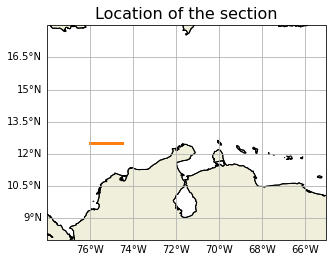

In [12]:
# Define the point section to plot the line
xpts = np.arange(lon_min,lon_max,0.5)
ypts =lat+0.*np.array(range(len(xpts)))

# Define the caracteristics of the plot 
f = plt.figure(figsize=(5, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-78, -65, 8, 18],crs=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)#, dms=True)#, x_inline=False, y_inline=False)
gl.right_labels = False
gl.top_labels = False
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')
ax.set_title("Location of the section",fontsize=16)

# Plot the line
ax.plot(xpts,ypts,c='tab:orange',linewidth=3,transform=ccrs.PlateCarree())

In [13]:
for i in range(len(bio_line.time)):
    # Define the date
    date = bio_line.time[i].data
    
    # Define the caracteristics of the plot
    f = plt.figure(figsize=(12,12))
    ax1 = f.add_subplot(311)
    ax2 = f.add_subplot(312)
    ax3 = f.add_subplot(313)
    f.suptitle('Date : '+np.datetime_as_string(date,unit='D'),fontsize=22)
    
    # First plot : temperature 
    ax1.set_title("Temperature (°C)",fontsize=20)
    ax1.set_ylabel("Depth (m)",fontsize=18)
    ax1.invert_yaxis()
    im1 = ax1.pcolor(phy_line['longitude'],phy_line['depth'],phy_line['thetao'].sel(time=date,method='nearest').squeeze(),vmin=25,vmax=28,cmap='plasma')
    f.colorbar(im1,ax=ax1)

    # Second plot : nitrate
    ax2.set_title("Nitrate (mgl-1)",fontsize=20)
    ax2.set_ylabel("Depth (m) ",fontsize=18)
    ax2.invert_yaxis()
    im2 = ax2.pcolor(bio_line['longitude'],bio_line['depth'],bio_line['no3'].sel(time=date,method='nearest').squeeze(),vmin=0,vmax=1)
    f.colorbar(im2,ax=ax2)

    # Third plot : chlorophyll
    ax3.set_ylabel("Depth (m)",fontsize=18)
    ax3.set_xlabel("Longitude",fontsize=18)
    ax3.set_title("Chlorophyll  (mgl-1)",fontsize=20)
    ax3.invert_yaxis()
    im3 = ax3.pcolor(bio_line['longitude'],bio_line['depth'],bio_line['chl'].sel(time=date,method='nearest').squeeze(),vmin=0,vmax=1)
    f.colorbar(im3,ax=ax3)
    
    plt.savefig('images/2018VertSlices/vertical_slices_date_'+'{:02}'.format(i)+'.png')
    
    plt.close() # Slices in 2018VertSlices file of images
    